<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Architectural%20Basics/DNN_All_Iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Architectural Basics**
##**Building a deep Neural network**

In this notebook, let's see how to build a neural network from scratch for MNIST image classification and how we can tune our architecture to optimize our network better step by step.  



**Import Libraries and Modules**

In [1]:
# https://keras.io/
# Importing Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
# Importing Keras classes used for building CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Importing Keras Inbuilt dataset
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


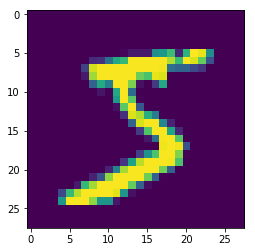

In [4]:
print (X_train.shape)
#Visualize one image in training set
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Preprocessing data

In [0]:
#Reshaping to hold the no of channels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Data converted to float and performed Image standardization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#Train Labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding**



In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
#Train Labels after one hot encoding, for example 5 is converted as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#**Iteration 1**
##**How we define a vanila neural network for our classification problem**

**Convolution Blocks & Transition Blocks**
*   We will start building our network by deciding how many convolution blocks we need based on our input image size and the size of the object we are trying to predict in the image
*   And we will decide where we will place our transition blocks (Max pooling and 1x1 block) in our architecture
*   We will have convolution blocks followed by transition blocks till we reach our recptive field. 

**Kernels**
*   We will decide the number of kernels used 
*   We keep increasing our no of kernels until we perform max pooling followed by pointwise convolution

**Max Pooling**
*   We make sure max pooling is 2 or more layers away from output





In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(Convolution2D(16, (3, 3), activation='relu'))#5

model.add(Convolution2D(16, 1, activation='relu')) #5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


W0829 06:25:29.252846 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 06:25:29.289044 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 06:25:29.295515 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 06:25:29.348824 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          2320      
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test))

W0829 06:25:29.466509 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 06:25:29.494266 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0829 06:25:29.751634 139715468093312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 06:25:29.870695 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 236us/step - loss: 0.3485 - acc: 0.8876 - val_loss: 0.1047 - val_acc: 0.9666
Epoch 2/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.0972 - acc: 0.9704 - val_loss: 0.0656 - val_acc: 0.9786
Epoch 3/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.0708 - acc: 0.9783 - val_loss: 0.0502 - val_acc: 0.9834
Epoch 4/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0593 - val_acc: 0.9815
Epoch 5/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.0491 - acc: 0.9845 - val_loss: 0.0498 - val_acc: 0.9847
Epoch 6/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.0437 - acc: 0.9870 - val_loss: 0.0366 - val_acc: 0.9885
Epoch 7/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0369 -

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03627348785162321, 0.9899]


## Observation

Achieved Validation Accuracy: 98.85, but Training Accuracy was 99.68.

Model seems to overfit the training data.

Few regularizations and batch normalization could be introduced to generalize the data better

#**Iteration 2**
##**Improvement**

*   Batch Normalization
    - We have standardized our inputs by dividing it by 255, but when we are convolving the values again in our network, we are getting values which are not ranging from 0 to 1. Different layers are getting values in different range. So its better to introduce Batch normalization after we perform our convolution each time.
    
    - Moreover during backpropagation, neural networks can be generalized better when the distribution of values are normalized.
     


In [14]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 5
model.add(BatchNormalization())

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

W0829 06:29:14.334406 139715468093312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [15]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print(score)

[0.05036503328697222, 0.9895]




##Observation:


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more


#**Iteration 3**

*  Adding any regularization method, will help in avoiding overfitting the data, Adding Dropout in the next iteration


In [17]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
W0829 06:48:57.798825 139715468093312 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python

In [18]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 221us/step - loss: 0.2646 - acc: 0.9154 - val_loss: 0.0692 - val_acc: 0.9771
Epoch 2/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.0633 - acc: 0.9806 - val_loss: 0.0452 - val_acc: 0.9855
Epoch 3/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0476 - val_acc: 0.9852
Epoch 4/30
60000/60000 [==============================] - 11s 184us/step - loss: 0.0381 - acc: 0.9883 - val_loss: 0.0361 - val_acc: 0.9882
Epoch 5/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0332 - val_acc: 0.9888
Epoch 6/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.0294 - acc: 0.9907 - val_loss: 0.0338 - val_acc: 0.9895
Epoch 7/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.0276 - acc: 0.9907 - val_loss: 0.

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03951352105533265, 0.9901]


##Observation:


1.   Adding Batch Normalization increases the accuracy meanwhile it increases the epoch time
2.   But the gap between the test accuracy(99.31) and train accuracy(99.72) is more


#**Iteration 4**

*    Reducing paramters under 15K - Since its a small dataset, reduing the number of kernels used.
*   Instead of adding a dropout of 0.25, more dropouts of 0.1 are introduced. 
*   Learning rate - a hyperparameter which tells how much to  the model weights can be updated in response to the loss

![Learning Rate](https://github.com/gkdivya/EVA/blob/master/Architectural%20Basics/assets/learning%20rate.png?raw=true)
*   Instead of a constant learning rate, step based learning rate schedules are better.





In [27]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11
model.add(Convolution2D(10, (1, 1), activation='relu')) #11

model.add(Convolution2D(16, (3, 3), activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, (5, 5)))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_27 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_28 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [25]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callbacks=[LearningRateScheduler(scheduler, verbose=1)]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, callbacks=callbacks, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 232us/step - loss: 0.2100 - acc: 0.9325 - val_loss: 0.0696 - val_acc: 0.9773
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 171us/step - loss: 0.0627 - acc: 0.9803 - val_loss: 0.0498 - val_acc: 0.9835
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 170us/step - loss: 0.0480 - acc: 0.9847 - val_loss: 0.0351 - val_acc: 0.9891
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 172us/step - loss: 0.0403 - acc: 0.9872 - val_loss: 0.0287 - val_acc: 0.9904
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.017445057881696993, 0.994]


##Observation:


1.   Adding stepwise learning rate increases the validation accuracy as 99.4
2.   Moreover the gap between the test accuracy(99.50) and train accuracy(99.40) is reduced.
